# EDA on Google Apps data

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt

In [6]:
df1=pd.read_csv("archive\googleplaystore.csv")
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df1.Rating = pd.to_numeric(df1.Rating, errors = 'coerce')
df1.Reviews = pd.to_numeric(df1.Reviews, errors = 'coerce')
df1.Price = pd.to_numeric(df1.Price, errors = 'coerce')

In [13]:
rat_mean=df1.Rating.mean()

pri_mean=df1.Price.mean()

In [14]:
df1.Rating.fillna(rat_mean,inplace=True)
df1.Price.fillna(pri_mean,inplace=True)

In [15]:
df1.dropna(axis=0,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  float64
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [16]:
g1=df1.groupby('Content Rating')['App'].count().reset_index()
g1

,Content Rating,App
0,Adults only 18+,3
1,Everyone,8704
2,Everyone 10+,413
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


In [17]:
plt.style.use('dark_background')

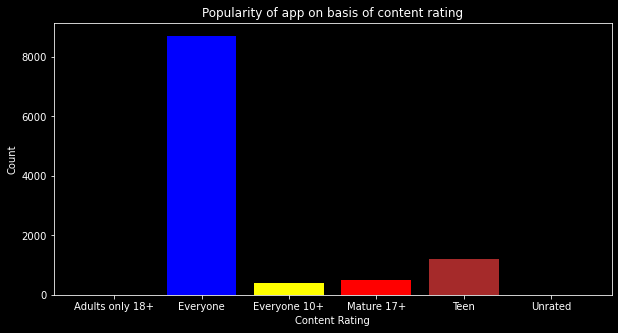

    Content Rating   App
0  Adults only 18+     3
1         Everyone  8704
2     Everyone 10+   413
3       Mature 17+   499
4             Teen  1208
5          Unrated     2


In [18]:
plt.figure(figsize = (10, 5))
plt.bar('Content Rating', 'App',data = g1, color = ['green', 'blue', 'yellow', 'red', 'brown'])
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Popularity of app on basis of content rating')
plt.show()
print(g1)

It is clear that on Google play store more apps are present of every ones use for all age type people.


In [19]:
g2=df1.Category.value_counts().reset_index()
g2

,index,Category
0,FAMILY,1968
1,GAME,1144
2,TOOLS,841
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,390
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


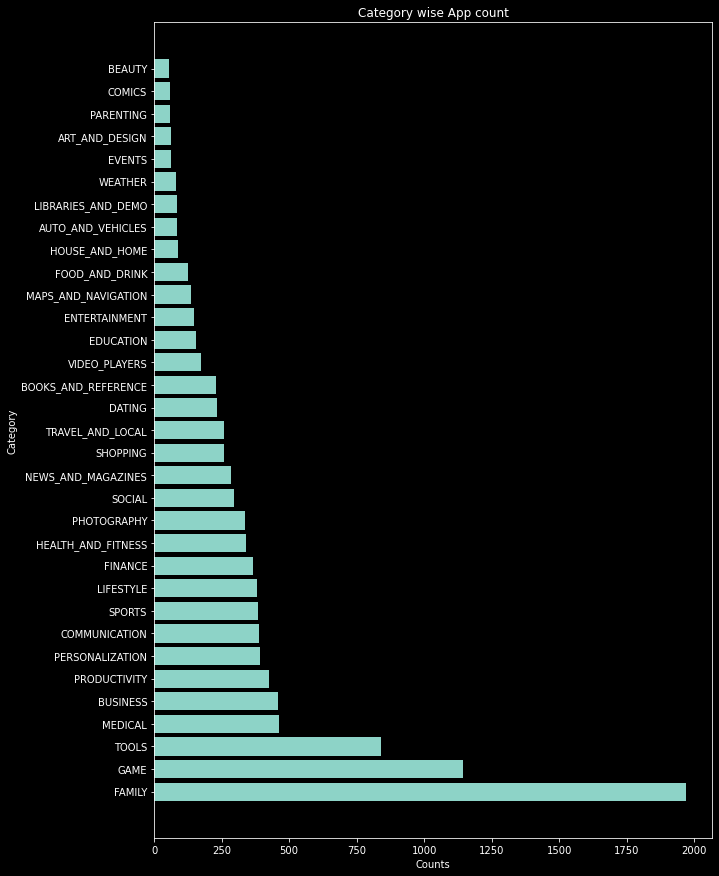

In [20]:
plt.figure(figsize = (10, 15))
plt.barh('index', 'Category',data = g2)
plt.xlabel('Counts')
plt.ylabel('Category')
plt.title('Category wise App count')
plt.show()

Family apps, Game apps and tool apps are more popular on Google play store.

In [21]:
g3 = df1.Rating.value_counts(sort=True).reset_index()
g3

,index,Rating
0,4.193338,1469
1,4.400000,1108
2,4.300000,1076
3,4.500000,1037
4,4.200000,951
5,4.600000,823
6,4.100000,707
7,4.000000,567
8,4.700000,499
9,3.900000,386


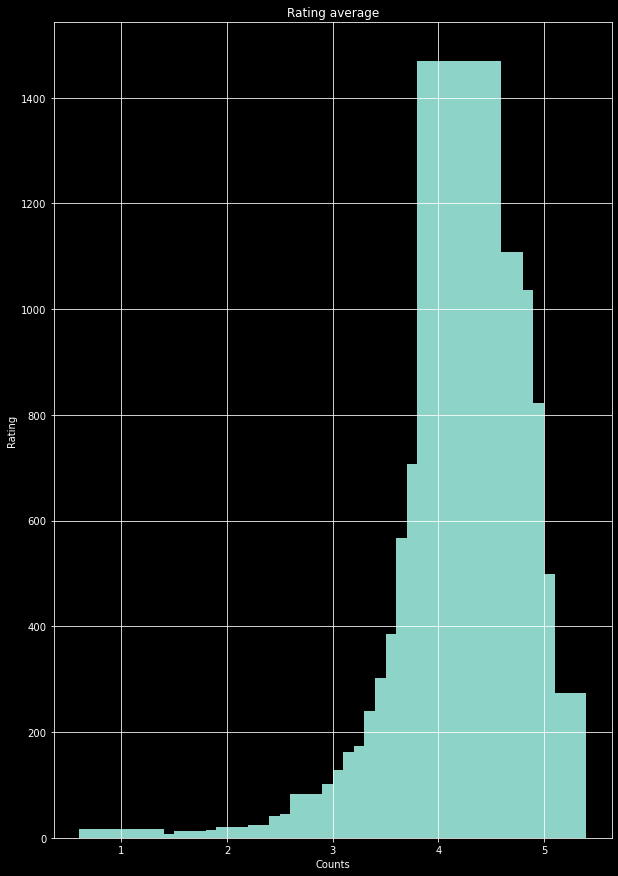

In [22]:
plt.figure(figsize = (10, 15))
plt.bar('index', 'Rating',data = g3)
plt.xlabel('Counts')
plt.ylabel('Rating')
plt.title('Rating average')
plt.grid(True)
plt.show()

More number of apps are present with rating range of 3.9 to 4.8

In [23]:
g4=df1.Installs.value_counts().reset_index()
g4

,index,Installs
0,"1,000,000+",1578
1,"10,000,000+",1252
2,"100,000+",1169
3,"10,000+",1052
4,"1,000+",905
5,"5,000,000+",752
6,100+,718
7,"500,000+",538
8,"50,000+",478
9,"5,000+",476


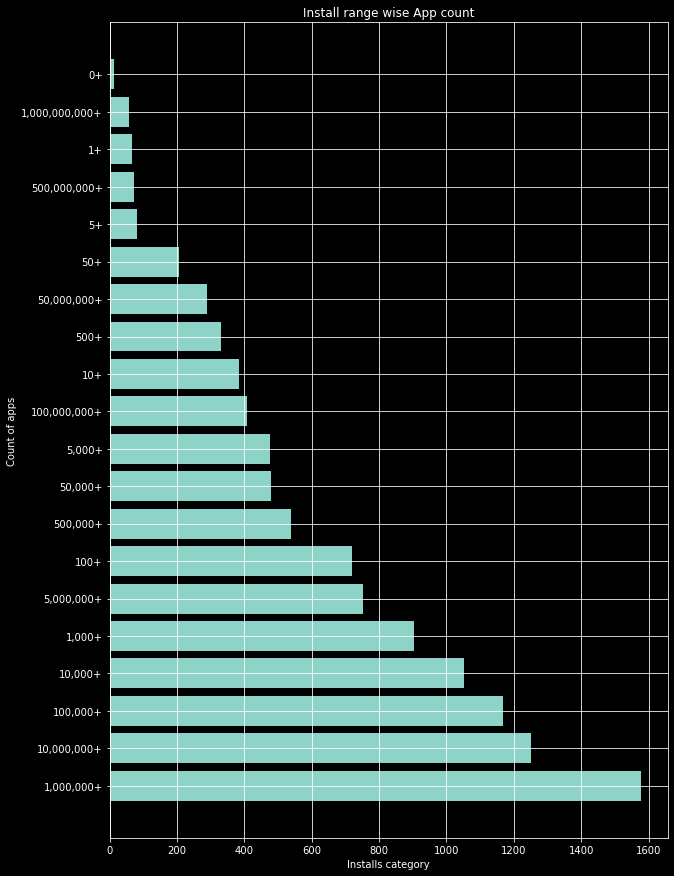

In [24]:
plt.figure(figsize = (10, 15))
plt.barh('index', 'Installs',data = g4)
plt.xlabel('Installs category')
plt.ylabel('Count of apps')
plt.title('Install range wise App count')
plt.grid(True)
plt.show()


Very Few apps have largest pupularity like only 58 apps only 1,000,000,000+ installs.
While 1578 have 1,000,000+ insatlls.